In [353]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose  import make_column_transformer, make_column_selector

In [3]:
milk = pd.read_csv('Datasets/milk.csv', index_col = 0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [4]:
pca = PCA().set_output(transform = 'pandas')

In [5]:
scaler = StandardScaler().set_output(transform = 'pandas')
milk_scl = scaler.fit_transform(milk)

In [6]:
milk_scl.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988


In [7]:
x = pca.fit_transform(milk)

In [8]:
x.shape

(25, 5)

In [9]:
scores = pca.fit_transform(milk_scl)

In [10]:
var_cov = np.cov(milk_scl.T)
values, vectors = np.linalg.eig(var_cov)
values

array([4.0404117 , 0.92437238, 0.00656977, 0.13429088, 0.1026886 ])

In [11]:
scores.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

In [12]:
vectors

array([[-0.47294379,  0.35285509, -0.70967042,  0.36921298,  0.10893632],
       [ 0.46657047,  0.32094099, -0.1930657 ,  0.15196177, -0.78672876],
       [ 0.44868269, -0.47603724, -0.66831106, -0.30699163,  0.17660367],
       [-0.48289116,  0.05951482, -0.11159049, -0.77642589, -0.38468756],
       [ 0.35232959,  0.73643513,  0.00118661, -0.378825  ,  0.43590982]])

In [13]:
pca.components_

array([[ 0.47294379, -0.46657047, -0.44868269,  0.48289116, -0.35232959],
       [ 0.35285509,  0.32094099, -0.47603724,  0.05951482,  0.73643513],
       [-0.36921298, -0.15196177,  0.30699163,  0.77642589,  0.378825  ],
       [-0.10893632,  0.78672876, -0.17660367,  0.38468756, -0.43590982],
       [ 0.70967042,  0.1930657 ,  0.66831106,  0.11159049, -0.00118661]])

#### NOTE: Variances of the PCA scores are nothing but the eigen values of variance - covariance matrix

##### Total variations

In [16]:
total_var = scores.var().sum()
total_var

5.208333333333337

##### percentage variations

In [18]:
(scores.var()/total_var)*100

pca0    77.575905
pca1    17.747950
pca2     2.578385
pca3     1.971621
pca4     0.126140
dtype: float64

##### Directly : percentage variations 

In [20]:
pca.explained_variance_ratio_*100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

In [21]:
scores.head(1)

,pca0,pca1,pca2,pca3,pca4
Animal,,,,,
HORSE,2.435175,-0.231478,0.33015,0.307664,0.048184


NOTE: (pca0 + pca1) greater than 95% i.e taking these 2 columns is as good as taking 95% of data that is how dimentional reductionality is done using pca 

# Biplot

In [24]:
pip install pca

Note: you may need to restart the kernel to use updated packages.


In [25]:
from pca import pca

In [26]:
import matplotlib.pyplot as plt
model = pca()
results = model.fit_transform(milk_scl, col_labels = list(milk.columns), row_labels = list(milk.index))

[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


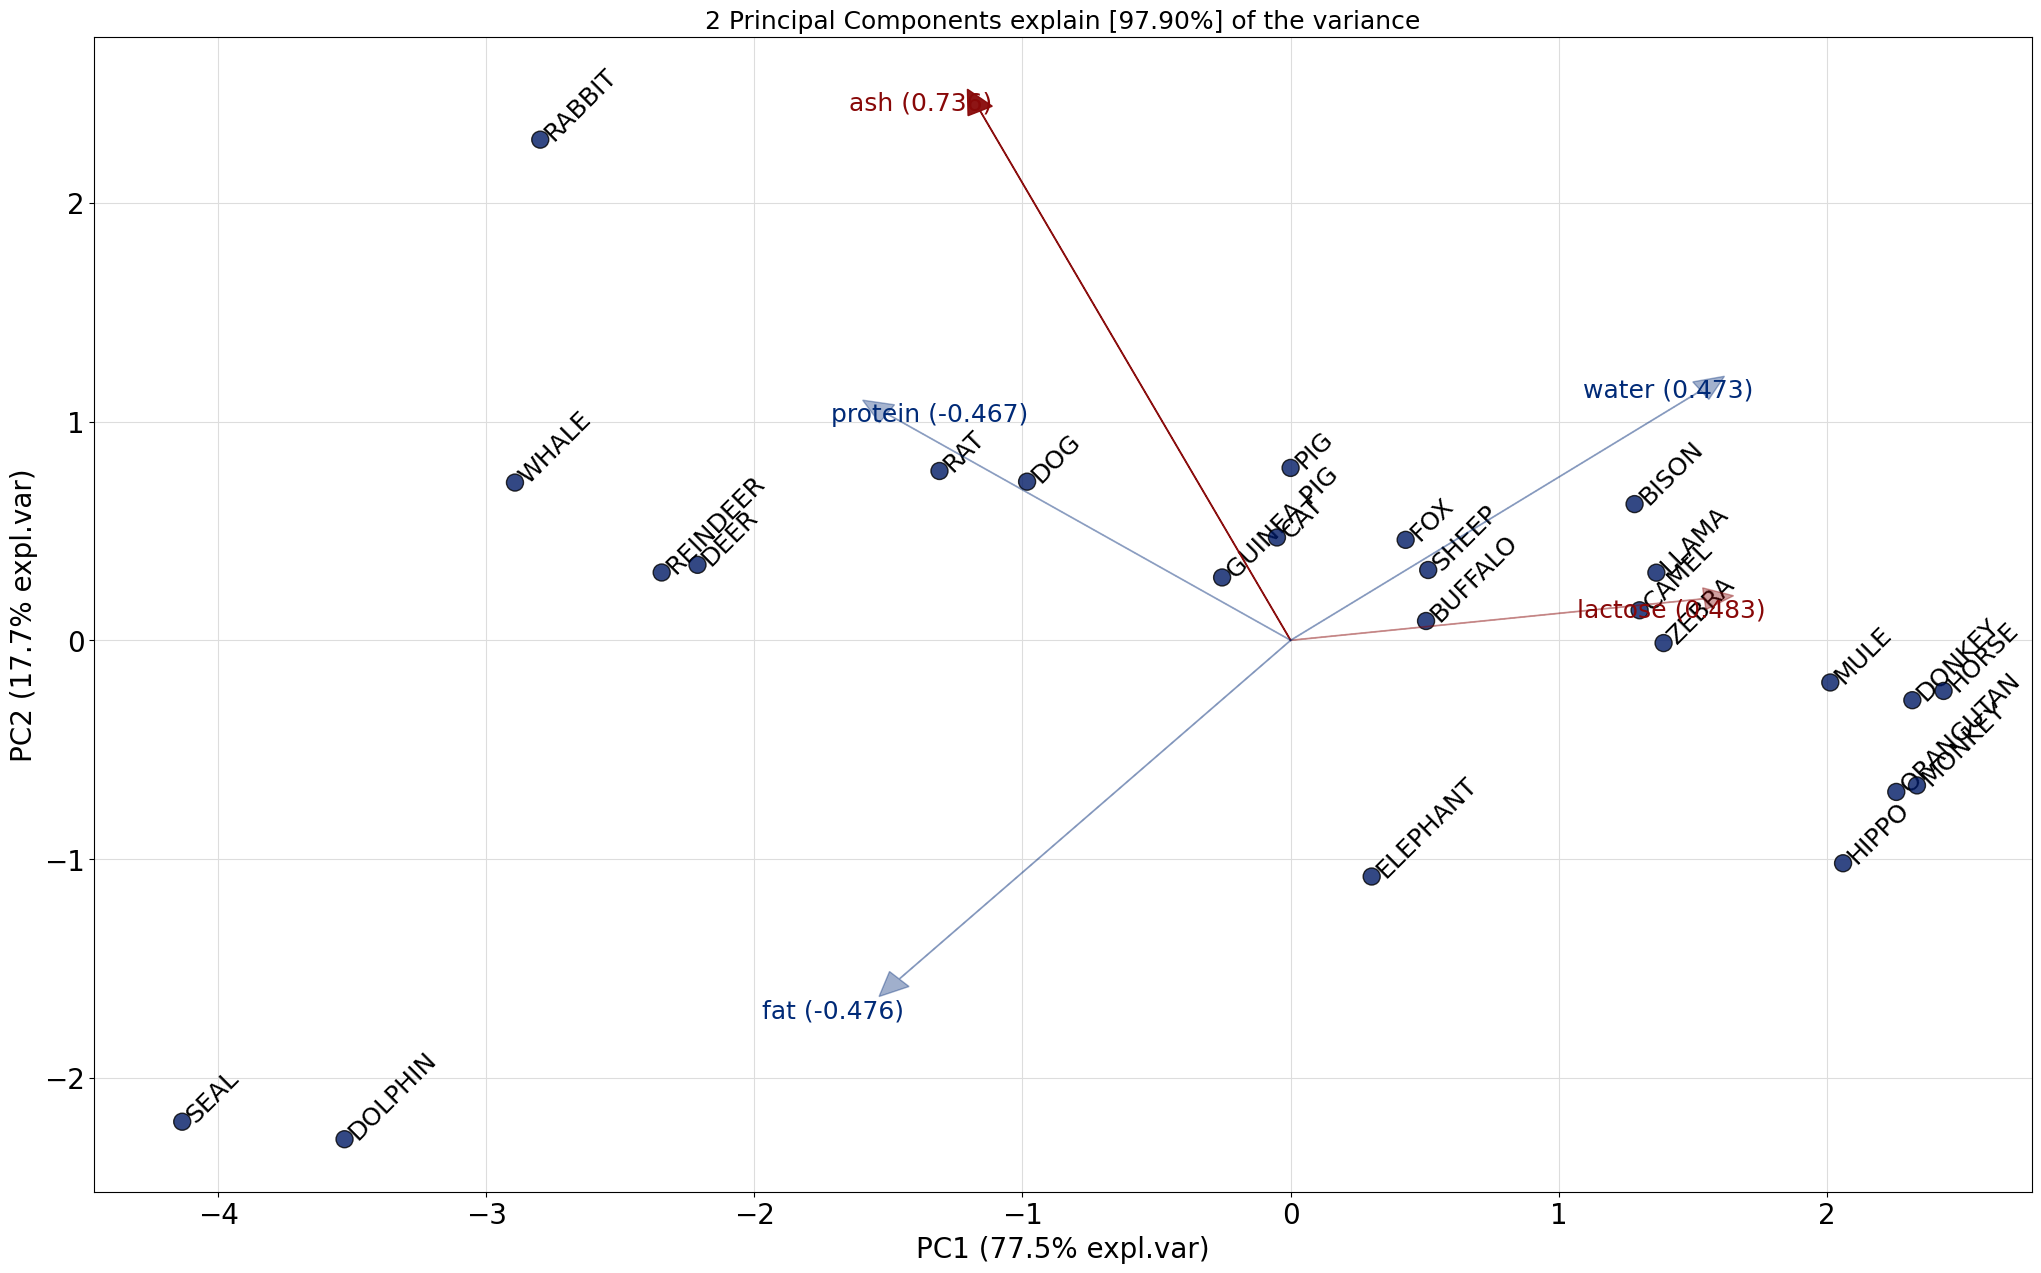

In [27]:
model.biplot(label = True, legend = True)
for i in np.arange(0, milk.shape[0]):
    plt.text(scores.values[i,0], scores.values[i,1], list(milk.index)[i], rotation = 45)
plt.show()

In [28]:
# Arrows are eigen vectors.
# Every column has eigen vector and they are mutually perpendicular.

In [29]:
results['PC']

,PC1,PC2
HORSE,2.435175,-0.231478
ORANGUTAN,2.258736,-0.693148
MONKEY,2.335861,-0.663328
DONKEY,2.318677,-0.273815
HIPPO,2.060294,-1.019199
CAMEL,1.301536,0.137303
BISON,1.282742,0.622667
BUFFALO,0.505068,0.088235
GUINEA PIG,-0.255502,0.287373
CAT,-0.051008,0.470136


In [30]:
results.keys()# it is a dictionary

dict_keys(['loadings', 'PC', 'explained_var', 'variance_ratio', 'model', 'scaler', 'pcp', 'topfeat', 'outliers', 'outliers_params'])

## Breast Cancer

In [91]:
df = pd.read_csv('Cases/Wisconsin/BreastCancer.csv', index_col = 0)
X = df.drop('Class', axis = 1)

In [93]:
pca = PCA().set_output(transform = 'pandas')

In [95]:
X1 = scaler.fit_transform(X)
x_pca = pca.fit_transform(X1)

In [99]:
pca.components_

array([[ 0.3026103 ,  0.38120509,  0.37768235,  0.33272243,  0.3362519 ,
         0.3336643 ,  0.34603577,  0.33602504,  0.22958816],
       [-0.14216061, -0.0485367 , -0.0849296 , -0.04409829,  0.16558909,
        -0.25303695, -0.22957052,  0.0241358 ,  0.90749339],
       [ 0.8629704 , -0.01443178,  0.03851777, -0.42587557, -0.10521945,
        -0.01189156, -0.19489993, -0.12416458,  0.08720566],
       [ 0.10670941, -0.20339625, -0.17207221,  0.46640884, -0.39463013,
         0.53218824,  0.0104344 , -0.44705783,  0.24732605],
       [-0.06214172,  0.13680009,  0.10399012, -0.0114335 ,  0.66974304,
         0.12253974, -0.25126738, -0.65077411, -0.12753628],
       [ 0.27250308,  0.09762242,  0.01814735,  0.67857344, -0.04235109,
        -0.60585095, -0.25371241, -0.0464848 , -0.14156586],
       [-0.01408445,  0.19920448,  0.12433121, -0.12398687, -0.17607418,
        -0.38528134,  0.70475995, -0.48607138,  0.1299708 ],
       [-0.23193178,  0.45060973,  0.59052487, -0.10130115, -0

In [105]:
pca.explained_variance_ratio_ * 100

array([65.45437483,  8.62625123,  5.98724547,  5.13612665,  4.21920122,
        3.39206535,  3.28441735,  2.91485025,  0.98546764])

In [107]:
X.columns

Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Clump', ylabel='Uni_CellShape'>

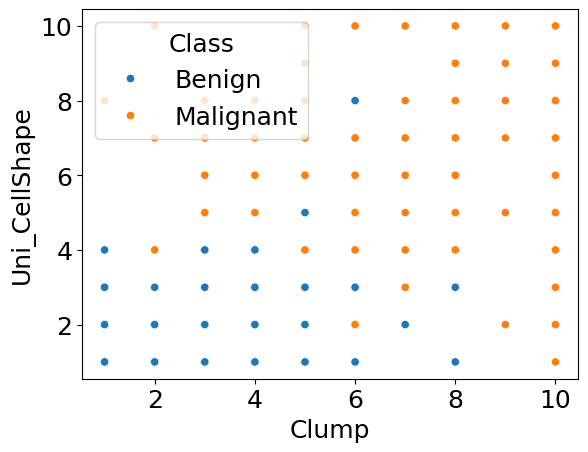

In [121]:
sns.scatterplot(x = 'Clump', y = 'Uni_CellShape', hue= 'Class', data= df)

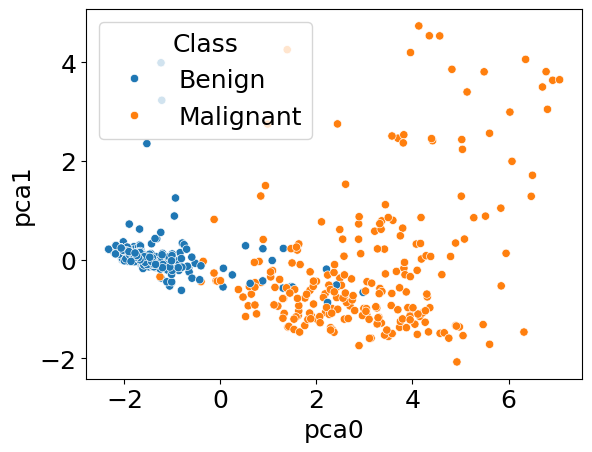

In [133]:
df_pca = x_pca.copy()
df_pca['Class']= df['Class']
sns.scatterplot(x = 'pca0', y = 'pca1', hue= 'Class',data= df_pca)
plt.show()

# usage with **supervised learning**

In [138]:
X = df.drop('Class', axis = 1)
y = df.Class

In [322]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [178]:
pipe_pca = Pipeline([('SCL', scl), ('PCA', pca)])
X_trn_pca = pipe_pca.fit_transform(X_train)
pca.explained_variance_ratio_ * 100

array([65.78198524,  8.37855242,  5.9745347 ,  4.9723016 ,  4.57807278,
        3.43591886,  3.02492594,  2.80312934,  1.05057912])

In [190]:
lr.fit(X_trn_pca.iloc[:,:1], y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:1])
accuracy_score(y_test, y_pred)

0.9714285714285714

In [176]:
pca.explained_variance_ratio_ * 100

array([65.78198524,  8.37855242,  5.9745347 ,  4.9723016 ,  4.57807278,
        3.43591886,  3.02492594,  2.80312934,  1.05057912])

#### without doing dimentional reductionality

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24, test_size = 0.3, stratify = y)
lr = LogisticRegression()
scl = StandardScaler()

In [146]:
pipe = Pipeline([('SCL', scl), ('PCA', pca), ('LR', lr)])

In [150]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('SCL', StandardScaler()), ('PCA', PCA()),
                ('LR', LogisticRegression())])

In [166]:
y_pred = pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714285714285714

# methods of PCA

### n_components
- pca = PCA(n_components = 9).set_output(transform = 'pandas')

In [232]:
pca = PCA(n_components = 1).set_output(transform = 'pandas')

In [234]:
pipe_pca = Pipeline([('SCL', scl), ('PCA', pca)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca, y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca)
accuracy_score(y_test, y_pred)

0.9714285714285714

In [262]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [289]:
lr = LogisticRegression(random_state = 24)
pca = PCA().set_output(transform = 'pandas')
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
pipe_pca = Pipeline([('SCL', scl), ('PCA', pca), ('LR', lr)])
params = {'PCA__n_components' : [2, 3, 4, 5, 6]}
gcv = GridSearchCV(pipe, cv = kfold, scoring = 'roc_auc', param_grid = params)
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('SCL', StandardScaler()),
                                       ('PCA', PCA()),
                                       ('LR', LogisticRegression())]),
             param_grid={'PCA__n_components': [2, 3, 4, 5, 6]},
             scoring='roc_auc')

In [291]:
gcv.best_params_

{'PCA__n_components': 6}

In [293]:
gcv.best_score_

0.9949406590156368

### using LDA

In [308]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [310]:
lda = LinearDiscriminantAnalysis()
pipe_lda = Pipeline([('LDA', lda), ('LR', lr)])

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24, test_size = 0.3, stratify = y)
pipe_lda.fit(X_train, y_train)

Pipeline(steps=[('LDA', LinearDiscriminantAnalysis()),
                ('LR', LogisticRegression(random_state=24))])

In [314]:
y_pred = pipe_lda.predict(X_test)
accuracy_score(y_test, y_pred)

0.9619047619047619

In [326]:
y_pred_proba = pipe_lda.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_proba)

0.995269726247987

In [ ]:
- using cross_val_Score

In [328]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(pipe_lda, X, y, scoring = 'roc_auc', cv = StratifiedKFold(n_splits = 5, shuffle = True))

In [330]:
result.mean()

0.9941149393345489

In [332]:
- doing using gcv

SyntaxError: invalid syntax (2490236839.py, line 1)

In [334]:
params = {}
gcv = GridSearchCV(pipe_lda, cv = kfold, scoring = 'roc_auc', param_grid = params)
gcv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('LDA', LinearDiscriminantAnalysis()),
                                       ('LR',
                                        LogisticRegression(random_state=24))]),
             param_grid={}, scoring='roc_auc')

In [336]:
gcv.best_score_

0.9945307446915699